
**Reading the Iris data into a Pandas dataframe**

In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Perform standardization on each of the features**

In [ ]:
import numpy as np

# extract sepal length and petal length
Xs = df.iloc[0:150, [0, 2]].values

# standardize features
sepal_length = Xs[:, 0]
Xs[:, 0] = (sepal_length - np.mean(sepal_length))/np.std(sepal_length)

petal_length = Xs[:, 1]
Xs[:, 1] = (petal_length - np.mean(petal_length))/np.std(petal_length)

**Plotting the Iris data**

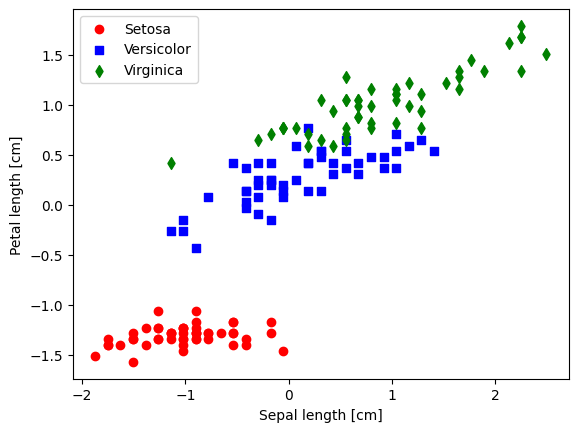

In [ ]:
import matplotlib.pyplot as plt

# select setosa, versicolor and virginica
ys = df.iloc[0:150, 4].values

# plot data
plt.scatter(Xs[:50, 0], Xs[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(Xs[50:100, 0], Xs[50:100, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(Xs[100:150, 0], Xs[100:150, 1],
            color='green', marker='d', label='Virginica')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
#plt.axis('equal')

plt.show()

**Implementing the adaline learning algorithm**

In [ ]:
# The adaline class

class Adaline:
    def __init__(self, n_iter=50):
        self.n_iter = n_iter

    def fit(self, X, y, learning_rate = 0.01):
        self.w_ = [np.float_(0.)] * X.shape[1]
        self.b_ = np.float_(0.)
        self.empirical_risk_ = []
        m = len(y)

        for _ in range(self.n_iter):
            prediction_error = y - self.net_input(X)
            self.w_ += 2 * learning_rate * np.dot(X.T, prediction_error) / m
            self.b_ += 2 * learning_rate * prediction_error.mean()
            self.empirical_risk_.append((prediction_error**2).mean())
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.5, 1, 0)

    def get_error_rate(self, X, y):
        #error rate = number of errors / total number of predictions
        return sum(self.predict(X) != y)/len(y)

**Plotting the decision regions**

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')


**Classifying versicolor and virginica**

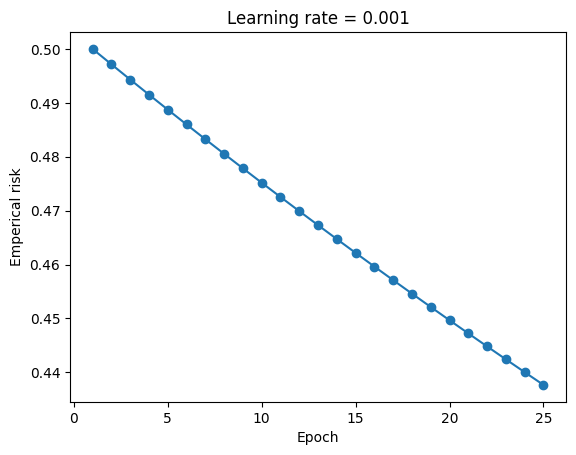

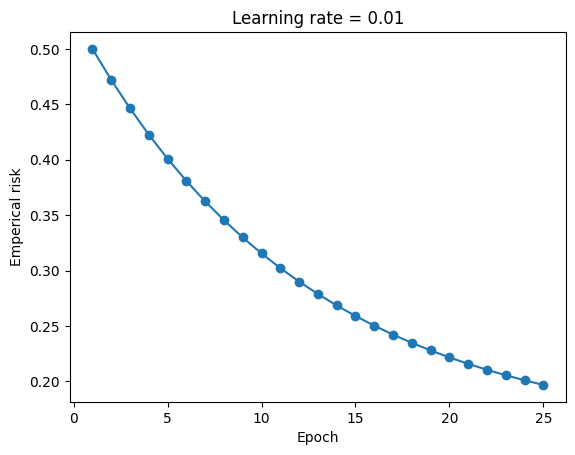

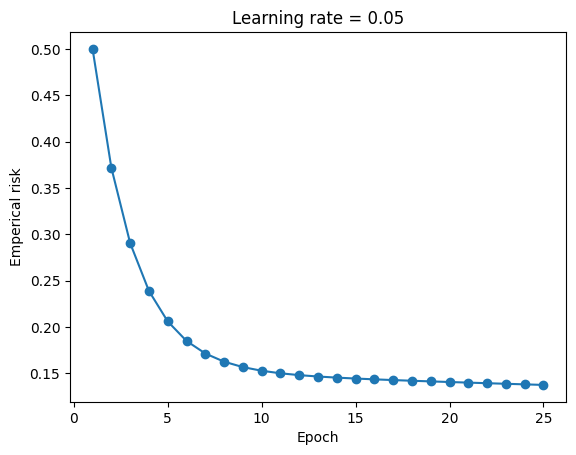

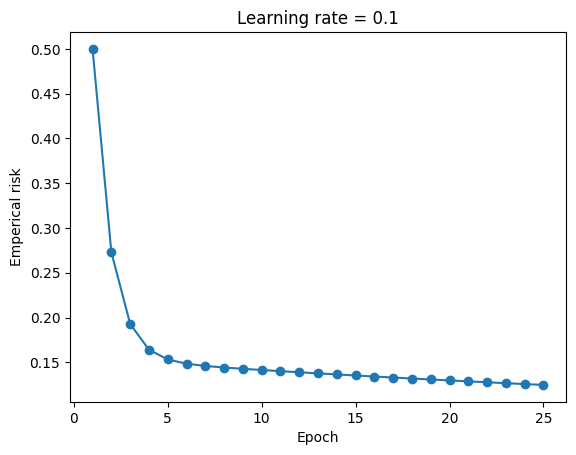

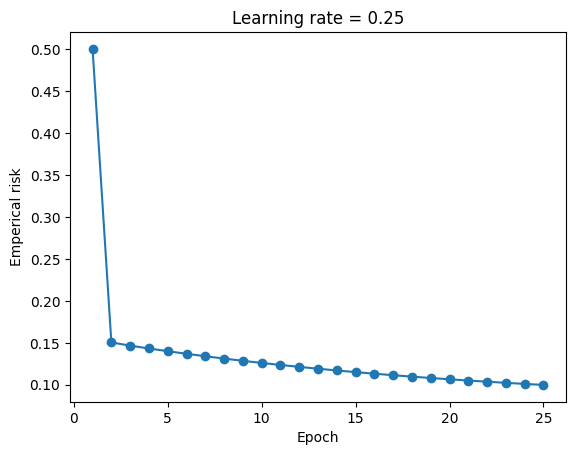

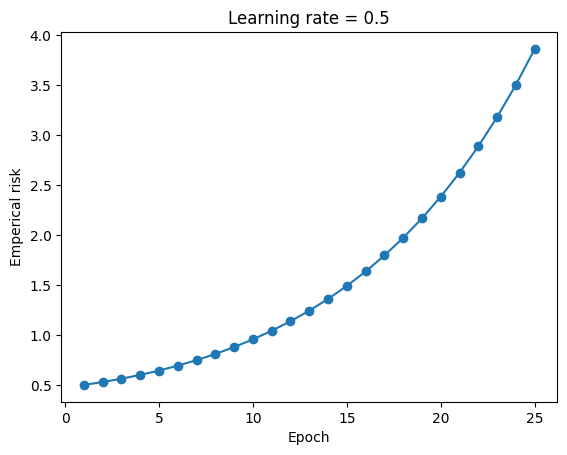

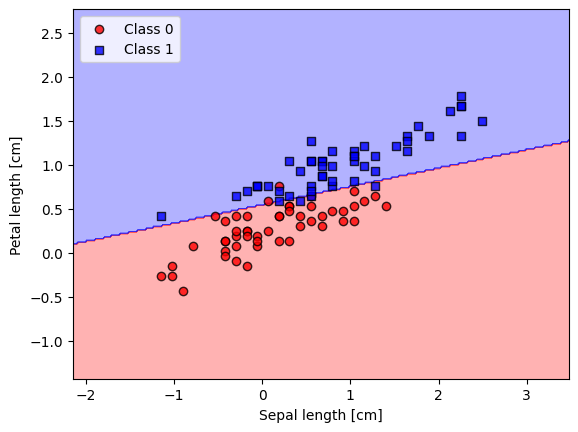

The error rate is 0.0500


In [ ]:
# Select versicolor and virginica
X = np.concatenate((Xs[50:100,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[50:100],ys[100:150]), axis=0)
y = np.where(y == 'Iris-versicolor', 0, 1)

# Train an Adaline
ada1_t = Adaline(n_iter=25)
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5]

for learning_rate in learning_rates:
    # Train an Adaline using learning_rate
    ada1_t.fit(X, y, learning_rate)
    plt.plot(range(1, len(ada1_t.empirical_risk_) + 1), ada1_t.empirical_risk_, marker='o')
    # Plot the emperical risk
    plt.xlabel('Epoch')
    plt.ylabel('Emperical risk')
    plt.title(f'Learning rate = {learning_rate}')
    plt.show()

# Train Adaline using n_iter=200, learning_rate=0.1
ada1 = Adaline(n_iter=200)
ada1.fit(X, y, 0.1)

# Plot the decision regions
plot_decision_regions(X, y, ada1)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#print error rate
print(f"The error rate is {ada1.get_error_rate(X, y):.4f}")

**Explanation of the convergence behavior**

As we tune the learning rate, we can observe the convergence of our algorithm. We see that if the learning rate is too low (0.001, 0.01), we must run way more iterations then larger learning rates for our gradient descent to converge at it's minimum. However, if our learning rate is too large (0.5), then our algorithm will likely not converge and instead increases our emperical risk.

**Implementing the all-pair scheme**

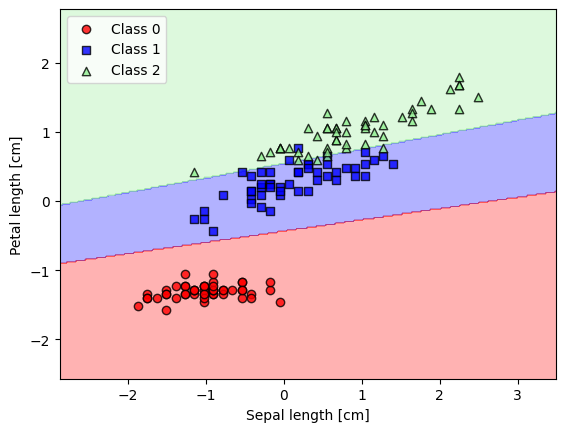

The error rate is 0.0333


In [ ]:
from itertools import combinations

class All_Pairs:
  def __init__(self, adalines):
    self.adalines = adalines

    #n: number of classes
    #given nCr = # of adalines and r = 2
    self.n = int(np.roots([1, -1, -2*len(adalines)])[0])

    #make list of all possible combinations
    self.combinations = list(combinations(range(self.n), 2))
    if(len(self.adalines) != len(self.combinations)):
      raise Exception("Number of adalines ({}) does not match number of combination ({})".format(len(self.adalines), len(self.adalines)))

  def predict(self, X):
    #make predictions for each adaline
    predictions = [adaline.predict(X) for adaline in self.adalines]

    yn = list()

    #loop over each data point
    for x in range(len(predictions[0])):
      #each votes index corresponds to one class
      votes = np.zeros(self.n)
      #loop over each adaline
      for p in range(len(predictions)):
        #take prediction of adaline p for data x
        prediction = predictions[p][x]
        #each adaline corresponds to one combination set
        combination = self.combinations[p]
        #increment class vote based on prediction
        votes[combination[0 if prediction == 0 else 1]] += 1
      #take index of max votes, if tied take first occurance
      yn.append(np.argmax(votes))
    return np.array(yn)

  def get_error_rate(self, X, y):
    #error rate = number of errors / total number of predictions
    return sum(self.predict(X) != y)/len(y)

# Select setosa and virginica
X = np.concatenate((Xs[0:50,:2],Xs[100:150,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[100:150]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and virginica data
ada2 = Adaline(n_iter=200)
ada2.fit(X, y, 0.1)

# Select setosa and versicolor
X = np.concatenate((Xs[0:50,:2],Xs[50:100,:2]), axis=0)
y = np.concatenate((ys[0:50],ys[50:100]), axis=0)
y = np.where(y == 'Iris-setosa', 0, 1)

# Train an Adaline using the setosa and versicolor data
ada3 = Adaline(n_iter=200)
ada3.fit(X, y, 0.1)

#convert to numerical classification
y = np.where(ys == 'Iris-setosa', 0, np.where(ys == 'Iris-versicolor', 1, 2))

#instantiate all-pairs object with three adalines
ap = All_Pairs([ada3, ada2, ada1])

# Plot the decision regions
plot_decision_regions(Xs, y, ap)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#print error rate
print(f"The error rate is {ap.get_error_rate(Xs, y):.4f}")

**Implementing the one-vs-all scheme**

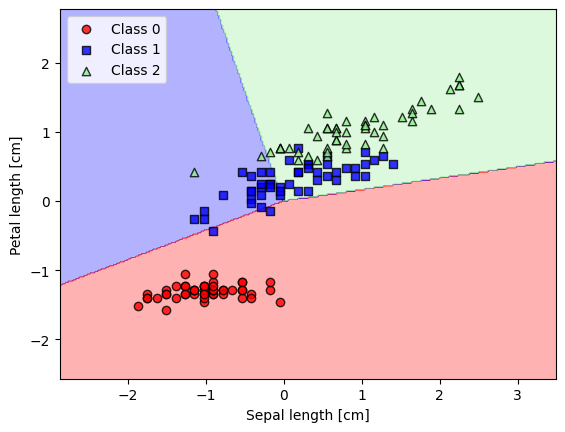

The error rate is 0.2067


In [ ]:
class One_vs_All:
  def __init__(self, adalines):
    self.adalines = adalines

  def predict(self, X):
    #make predictions for each adaline
    soft_pred = [adaline.net_input(X) for adaline in self.adalines]

    yn = list()

    #loop over each data point
    for x in range(len(soft_pred[0])):
      #make vector of y predicted
      y_pred = [soft_pred[p][x] for p in range(len(soft_pred))]

      #take index of max y predicted
      yn.append(np.argmax(y_pred))
    return np.array(yn)

  def get_error_rate(self, X, y):
    #error rate = number of errors / total number of predictions
    return sum(self.predict(X) != y)/len(y)

# Train versicolor vs rest
y = np.where(ys == 'Iris-versicolor', 1, 0)
ada1.fit(Xs, y, 0.1)

# Train setosa vs rest
y = np.where(ys == 'Iris-setosa', 1, 0)
ada2.fit(Xs, y, 0.1)

# Train versicolor vs rest
y = np.where(ys == 'Iris-virginica', 1, 0)
ada3.fit(Xs, y, 0.1)

#convert to numerical classification
y = np.where(ys == 'Iris-setosa', 0, np.where(ys == 'Iris-versicolor', 1, 2))

#instantiate all-pairs object with three perceptrons
ap = One_vs_All([ada2, ada1, ada3])

# Plot the decision regions
plot_decision_regions(Xs, y, ap)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

#print error rate
print(f"The error rate is {ap.get_error_rate(Xs, y):.4f}")

**Compare one-vs-all scheme with all-pairs approach**

We can see that the error rate of one-vs-all (\~20%) is much larger then the error rate of all pairs (\~3%). One reason might be due to versicolor vs. rest. This dataset has a class (versicolor) in between the other class (rest), which is not linearly seperable. Not only is it not linearly seperable, it will have a high error rate due to always misclassifying around 1/3 of the data points.